In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('../Linear Regression/DATA/cluster_mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df_dummies = pd.get_dummies(df.drop('name' , axis=1))

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_dummies)
scaled_df = pd.DataFrame(scaled_data , columns= df_dummies.columns)

In [6]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<Axes: >

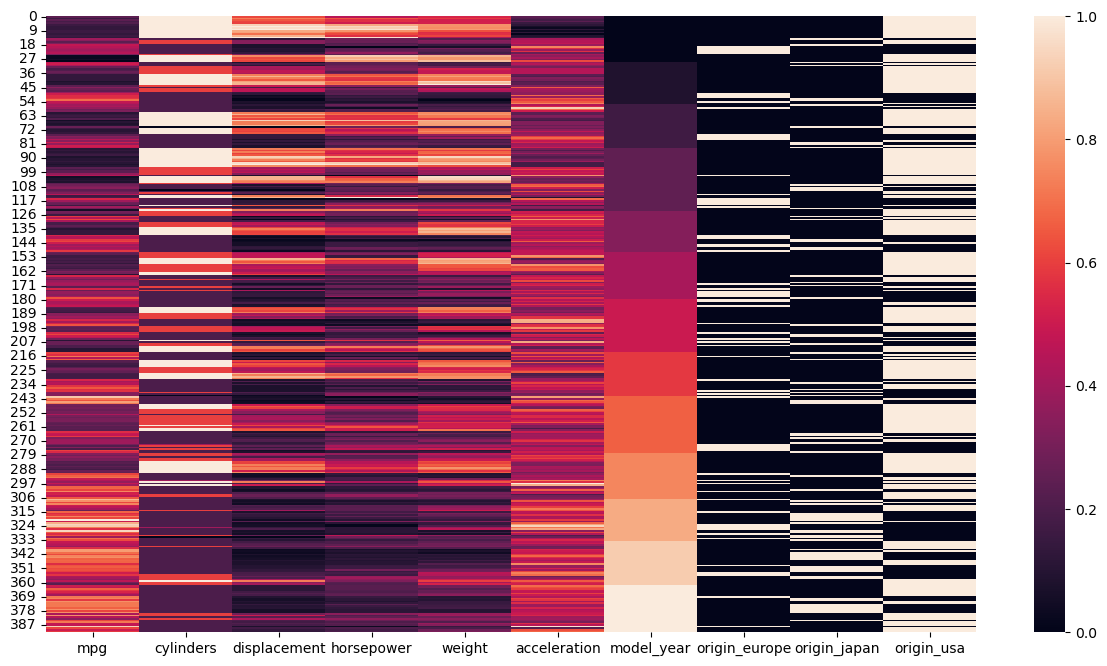

In [7]:
plt.figure(figsize = (15,8))
sns.heatmap(scaled_df )

<Figure size 1500x800 with 0 Axes>

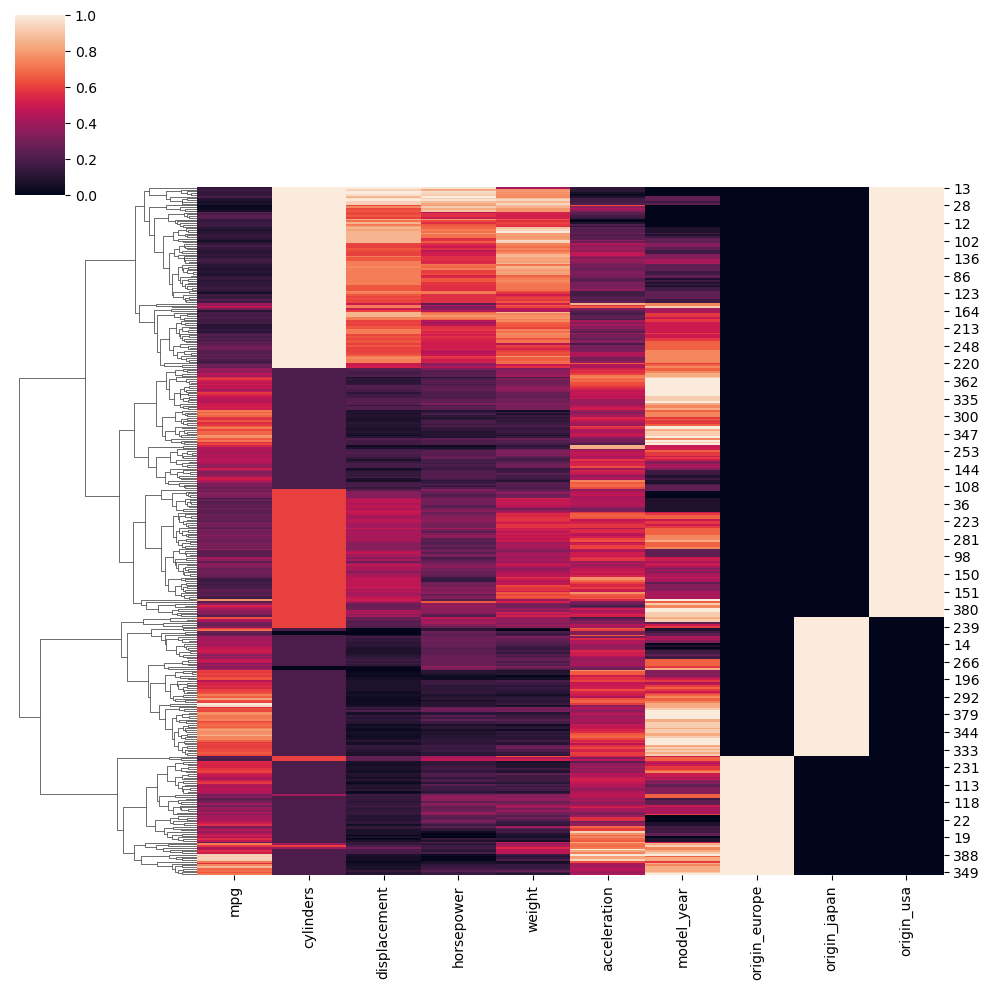

In [8]:
plt.figure(figsize = (15,8))
sns.clustermap(scaled_df , col_cluster=False)

In [7]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
cluster_label = model.fit_predict(scaled_df)

<Axes: xlabel='mpg', ylabel='weight'>

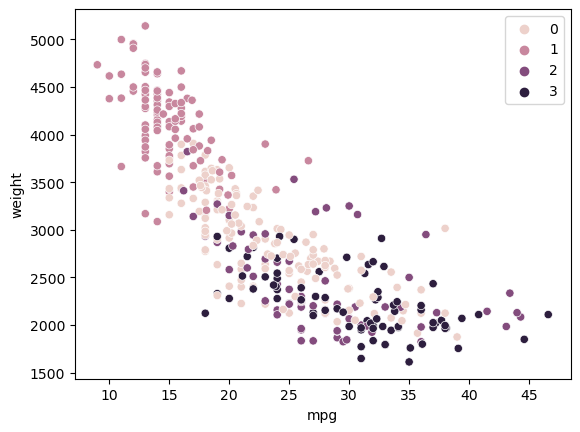

In [10]:
sns.scatterplot(data=df , x='mpg' , y = 'weight' , hue=cluster_label)

<Axes: xlabel='mpg', ylabel='horsepower'>

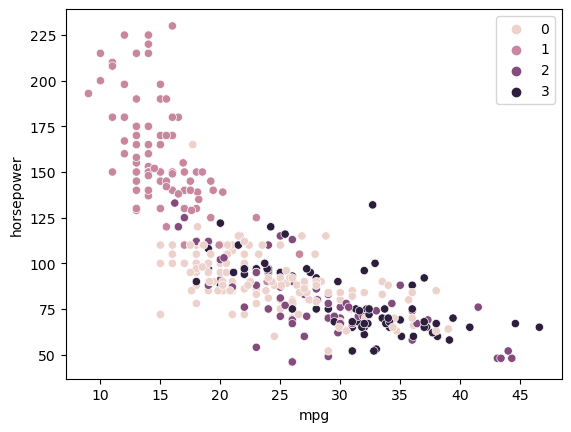

In [11]:
sns.scatterplot(data=df , x='mpg' , y = 'horsepower' , hue=cluster_label)

In [9]:
np.sqrt(len(scaled_df.columns))

3.1622776601683795

In [9]:
!pip install spicy

In [12]:
model = AgglomerativeClustering(n_clusters=None , distance_threshold=3)
cluster_label = model.fit_predict(scaled_df)
cluster_label

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 1, 4, 4, 4,
       4, 4, 0, 3, 3, 3, 3, 1, 7, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 7, 0, 0, 7, 4, 4, 4, 1, 1, 4, 7, 1, 7, 4, 7, 7, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 4, 4, 4, 4, 7, 1, 1, 7, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 4, 3, 3, 3, 3, 0, 1, 7, 1,
       1, 7, 0, 4, 3, 3, 4, 4, 4, 4, 3, 4, 1, 3, 0, 0, 0, 1, 7, 1, 7, 0,
       0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 1, 1, 7, 4, 4, 1, 1, 4, 0, 0, 0, 0,
       5, 3, 3, 3, 0, 0, 0, 0, 0, 5, 5, 1, 7, 0, 7, 1, 4, 1, 0, 4, 0, 4,
       4, 4, 4, 1, 4, 4, 7, 7, 4, 5, 5, 5, 5, 0, 0, 0, 0, 7, 7, 4, 1, 0,
       0, 0, 0, 4, 1, 1, 7, 4, 5, 8, 1, 4, 5, 5, 5, 5, 1, 2, 8, 7, 1, 5,
       5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 4, 7, 1, 7, 2, 2, 1, 4, 1, 4, 1,
       8, 2, 1, 6, 1, 5, 5, 5, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 5, 0, 5, 5,
       2, 1, 1, 2, 1, 2, 2, 1, 4, 4, 4, 4, 8, 1, 0, 0, 2, 0, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 8, 1, 2, 2, 8, 5, 8, 5, 2, 2,

In [2]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [13]:
linkage_mat = hierarchy.linkage(model.children_)
linkage_mat

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

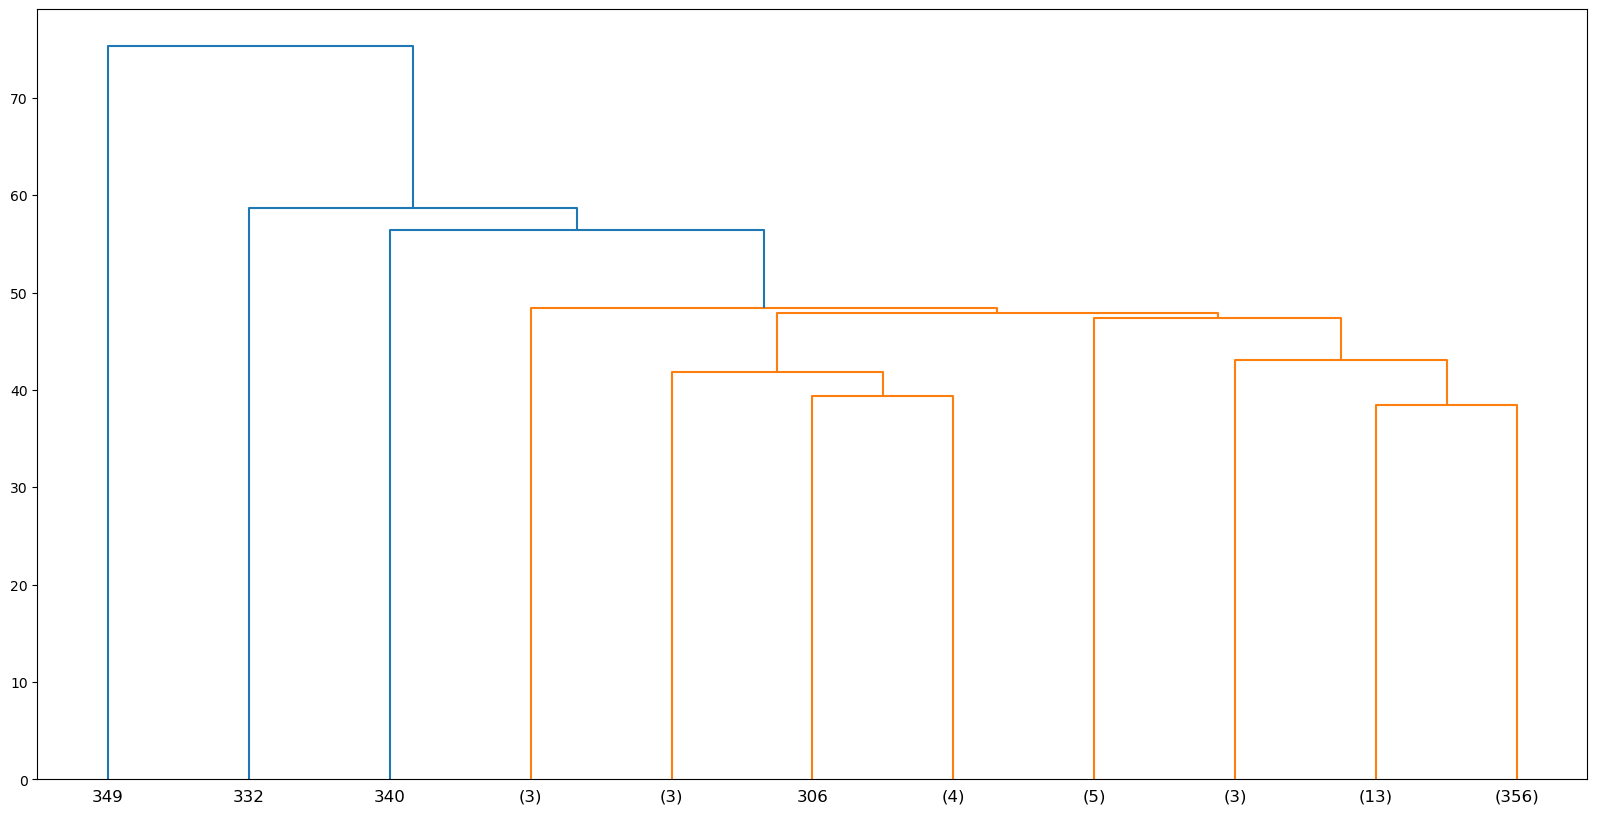

In [24]:
plt.figure(figsize=(20,10))
dendrogram(linkage_mat , truncate_mode='lastp' , p=11);

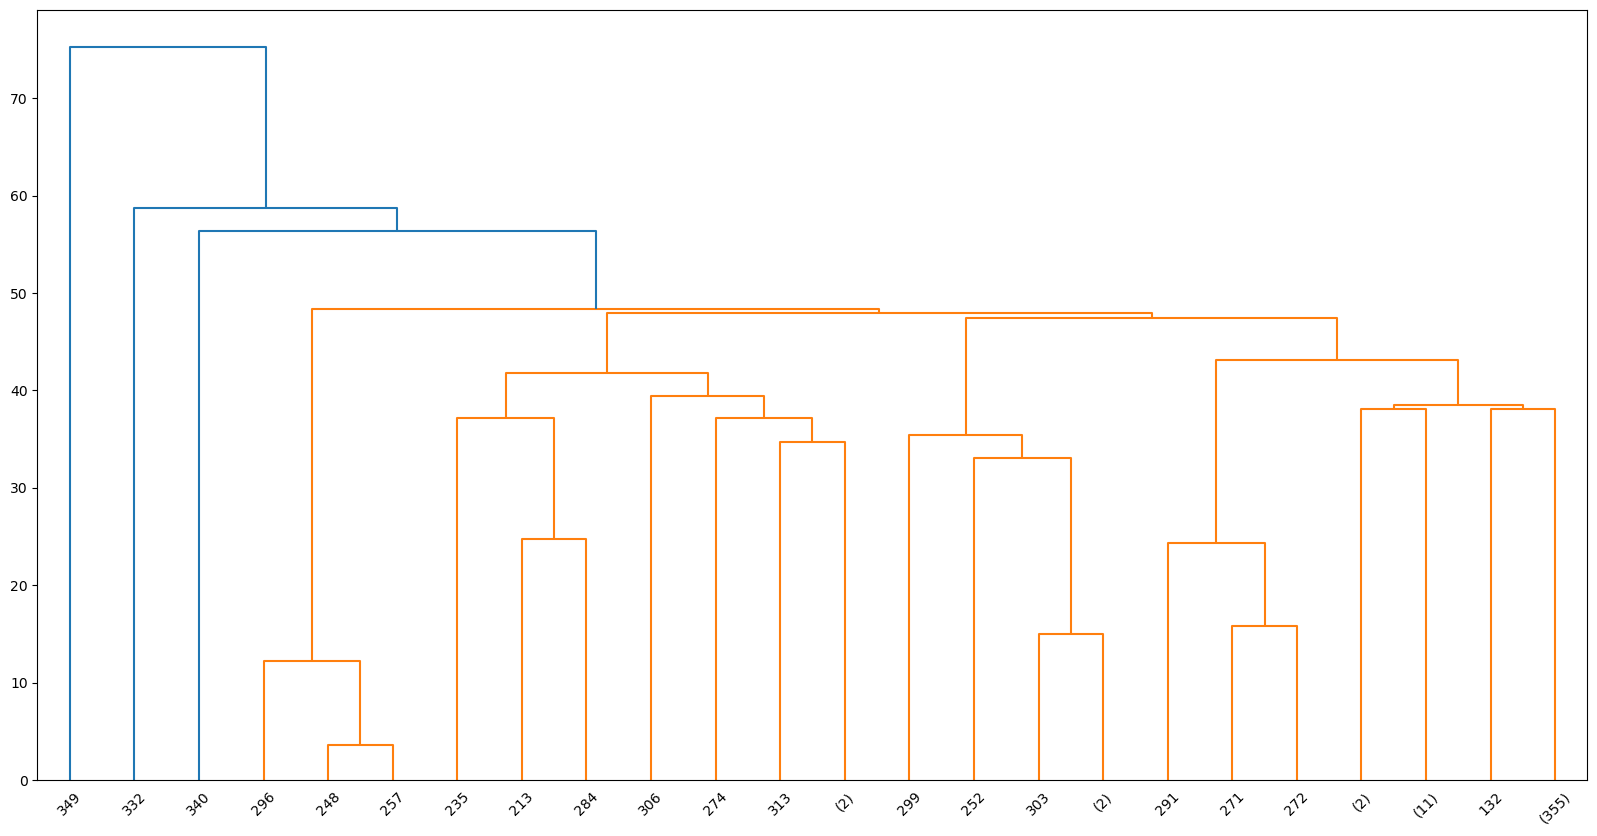

In [17]:
plt.figure(figsize=(20,10))
dendrogram(linkage_mat , truncate_mode='level' , p=8);

In [20]:
scaled_df['mpg'].idxmax()

320

In [21]:
scaled_df['mpg'].idxmin()

28

In [23]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]